## Graphs in the context of statistics

## Bar Plots
For variables measured on a nominal or an ordinal scale 

In [1]:
import pandas as pd
wnba = pd.read_csv('/Users/brindhamanivannan/Desktop/data-projects/datasets/wnba.csv')
wnba.head()

,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,...,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
0,Aerial Powers,DAL,F,183,71.0,21.200991,US,"January 17, 1994",23,Michigan State,...,6,22,28,12,3,6,12,93,0,0
1,Alana Beard,LA,G/F,185,73.0,21.329438,US,"May 14, 1982",35,Duke,...,19,82,101,72,63,13,40,217,0,0
2,Alex Bentley,CON,G,170,69.0,23.875433,US,"October 27, 1990",26,Penn State,...,4,36,40,78,22,3,24,218,0,0
3,Alex Montgomery,SAN,G/F,185,84.0,24.543462,US,"December 11, 1988",28,Georgia Tech,...,35,134,169,65,20,10,38,188,2,0
4,Alexis Jones,MIN,G,175,78.0,25.469388,US,"August 5, 1994",23,Baylor,...,3,9,12,12,7,0,14,50,0,0


<AxesSubplot:>

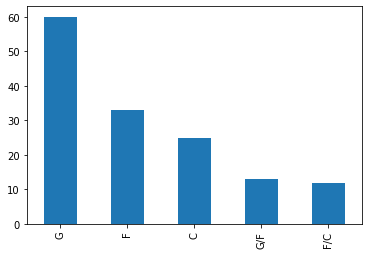

In [2]:
wnba['Pos'].value_counts().plot.bar()

<AxesSubplot:>

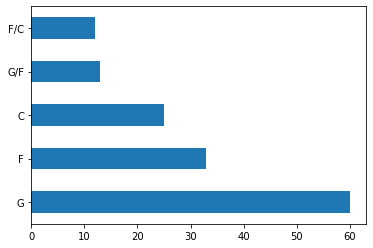

In [3]:
wnba['Pos'].value_counts().plot.barh()

0       93
1      217
2      218
3      188
4       50
      ... 
138    467
139     28
140    277
141    582
142    151
Name: PTS, Length: 143, dtype: int64


<AxesSubplot:ylabel='Frequency'>

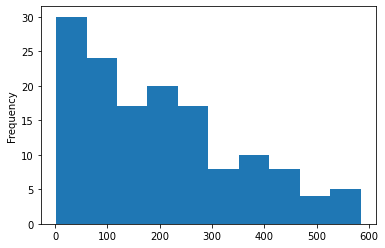

In [4]:
print(wnba['PTS'])
wnba['PTS'].plot.hist()

In [5]:
wnba.columns

Index(['Name', 'Team', 'Pos', 'Height', 'Weight', 'BMI', 'Birth_Place',
       'Birthdate', 'Age', 'College', 'Experience', 'Games Played', 'MIN',
       'FGM', 'FGA', 'FG%', '15:00', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB',
       'DREB', 'REB', 'AST', 'STL', 'BLK', 'TO', 'PTS', 'DD2', 'TD3'],
      dtype='object')

In [6]:
wnba['Experience']

0       2
1      12
2       4
3       6
4       R
       ..
138     6
139     9
140     2
141     8
142     2
Name: Experience, Length: 143, dtype: object

In [7]:
wnba['Experience'].replace({"R": "0"}, inplace=True)

In [8]:
wnba['Experience']

0       2
1      12
2       4
3       6
4       0
       ..
138     6
139     9
140     2
141     8
142     2
Name: Experience, Length: 143, dtype: object

In [9]:
wnba['Experience'] = pd.to_numeric(wnba['Experience'])

In [10]:
wnba['Experience']

0       2
1      12
2       4
3       6
4       0
       ..
138     6
139     9
140     2
141     8
142     2
Name: Experience, Length: 143, dtype: int64

In [11]:
def make_exp_ordinal(row):
    if row['Experience'] <= 0:
        return 'Rookie'
    if (1 < row['Experience'] <= 3):
        return 'Little experience'
    if (4 < row['Experience'] <= 5):
        return 'Experienced'
    if (5 < row['Experience'] <= 10):
        return 'Very experienced'
    if row['Experience'] > 10:
        return 'Veteran'
    
wnba['Exp_ordinal'] = wnba.apply(make_exp_ordinal, axis = 1) # new column

In [12]:
wnba.columns

Index(['Name', 'Team', 'Pos', 'Height', 'Weight', 'BMI', 'Birth_Place',
       'Birthdate', 'Age', 'College', 'Experience', 'Games Played', 'MIN',
       'FGM', 'FGA', 'FG%', '15:00', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB',
       'DREB', 'REB', 'AST', 'STL', 'BLK', 'TO', 'PTS', 'DD2', 'TD3',
       'Exp_ordinal'],
      dtype='object')

<AxesSubplot:>

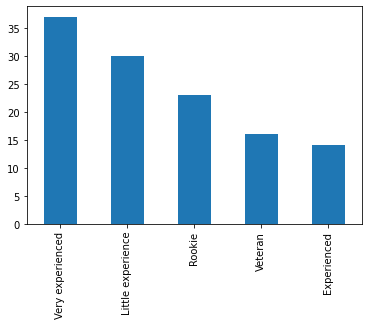

In [13]:
wnba['Exp_ordinal'].value_counts().iloc[[0,1,2,3,4]].plot.bar()

<AxesSubplot:>

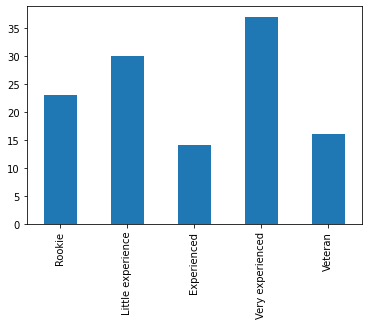

In [15]:
wnba['Exp_ordinal'].value_counts().iloc[[2,1,4,0,3]].plot.bar()

<AxesSubplot:>

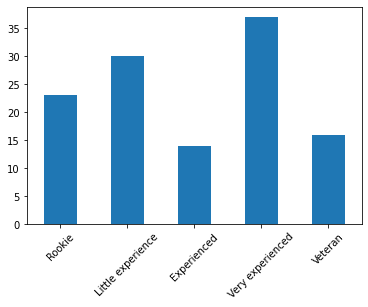

In [16]:
wnba['Exp_ordinal'].value_counts().iloc[[2,1,4,0,3]].plot.bar(rot=45)

<AxesSubplot:title={'center':'Number of players in WNBA by position'}>

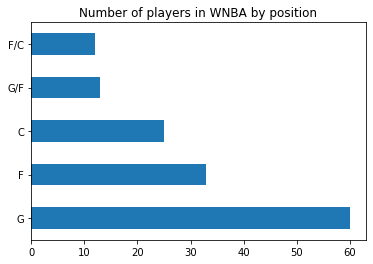

In [17]:
wnba['Pos'].value_counts().plot.barh(title = 'Number of players in WNBA by position')

<AxesSubplot:title={'center':'Number of players in WNBA by level of experience'}>

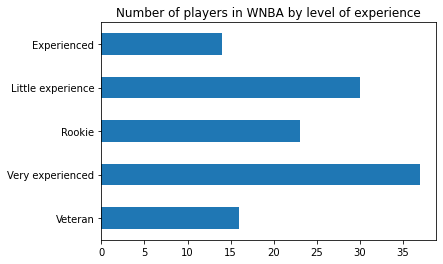

In [18]:
wnba['Exp_ordinal'].value_counts().iloc[[3,0,2,1,4]].plot.barh(
    title = 'Number of players in WNBA by level of experience')

<AxesSubplot:title={'center':'Number of players in WNBA by level of experience'}>

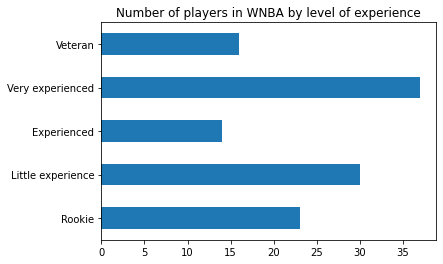

In [19]:
wnba['Exp_ordinal'].value_counts().iloc[[2,1,4,0,3]].plot.barh(
    title = 'Number of players in WNBA by level of experience')

<AxesSubplot:ylabel='Exp_ordinal'>

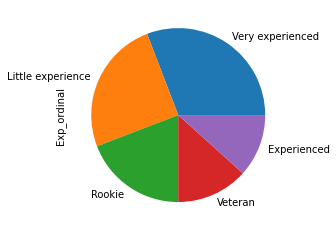

In [20]:
wnba['Exp_ordinal'].value_counts().plot.pie()

<AxesSubplot:ylabel='Pos'>

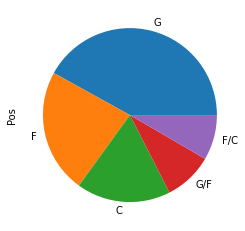

In [21]:
wnba['Pos'].value_counts().plot.pie()

Text(0, 0.5, '')

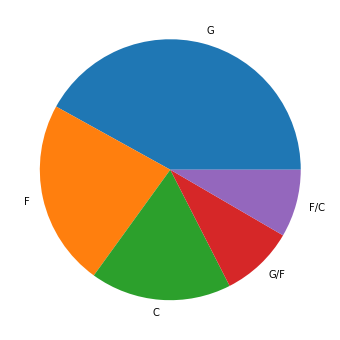

In [22]:
import matplotlib.pyplot as plt
wnba['Pos'].value_counts().plot.pie(figsize = (6,6))
plt.ylabel('')

<AxesSubplot:ylabel='Pos'>

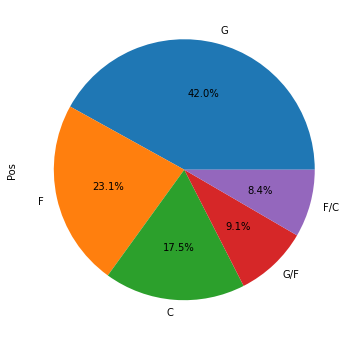

In [23]:
wnba['Pos'].value_counts().plot.pie(figsize = (6,6), autopct = '%.1f%%')

Text(0, 0.5, '')

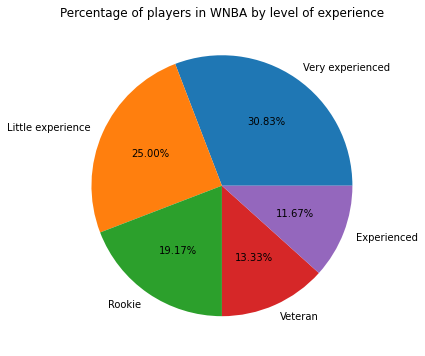

In [24]:
import matplotlib.pyplot as plt

wnba['Exp_ordinal'].value_counts().plot.pie(figsize = (6,6), autopct = '%.2f%%',
                                    title = 'Percentage of players in WNBA by level of experience')
plt.ylabel('')

In [25]:
print(wnba['PTS'].describe())

count    143.000000
mean     201.790210
std      153.381548
min        2.000000
25%       75.000000
50%      177.000000
75%      277.500000
max      584.000000
Name: PTS, dtype: float64


<AxesSubplot:ylabel='Frequency'>

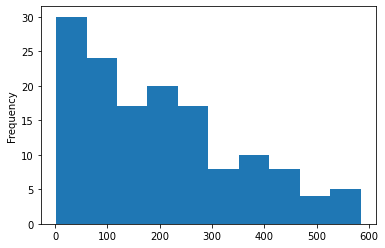

In [26]:
wnba['PTS'].plot.hist()

Under the hood, the wnba['PTS'].plot.hist() method:

- Generated a grouped frequency distribution table for the PTS variable with ten class intervals.
- For each class interval it plotted a bar with a height corresponding to the frequency of the interval.

In [27]:
print(wnba['PTS'].value_counts(bins = 10).sort_index())

(1.417, 60.2]     30
(60.2, 118.4]     24
(118.4, 176.6]    17
(176.6, 234.8]    20
(234.8, 293.0]    17
(293.0, 351.2]     8
(351.2, 409.4]    10
(409.4, 467.6]     8
(467.6, 525.8]     4
(525.8, 584.0]     5
Name: PTS, dtype: int64


<AxesSubplot:ylabel='Frequency'>

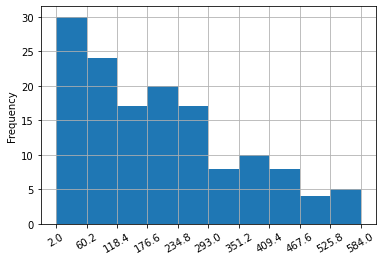

In [28]:
from numpy import arange
wnba['PTS'].plot.hist(grid = True, xticks = arange(2,585,58.2), rot = 30)

<AxesSubplot:ylabel='Frequency'>

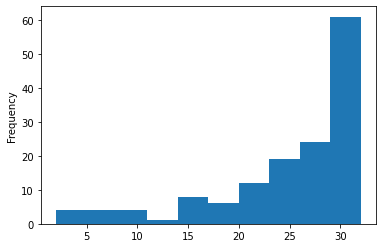

In [29]:
wnba['Games Played'].plot.hist()

Text(0.5, 0, 'Games played')

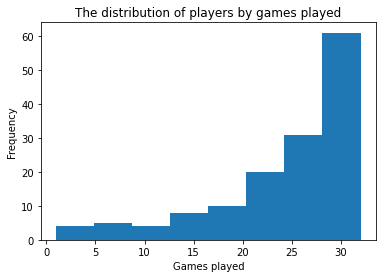

In [30]:
wnba['Games Played'].plot.hist(range = (1,32), bins = 8,
                               title = 'The distribution of players by games played')
plt.xlabel('Games played')

<AxesSubplot:ylabel='Frequency'>

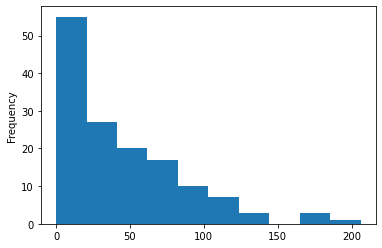

In [31]:
wnba['AST'].plot.hist() # right skewed

<AxesSubplot:ylabel='Frequency'>

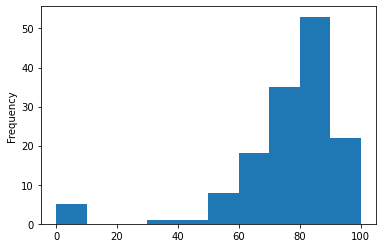

In [32]:
wnba['FT%'].plot.hist() # left skewed

<AxesSubplot:ylabel='Frequency'>

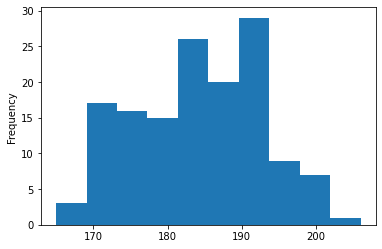

In [33]:
wnba['Height'].plot.hist() # normal distribution

<AxesSubplot:ylabel='Frequency'>

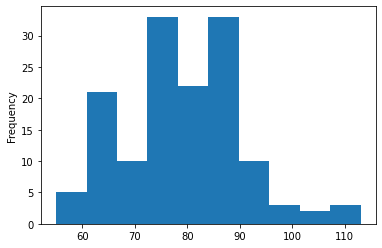

In [34]:
wnba['Weight'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

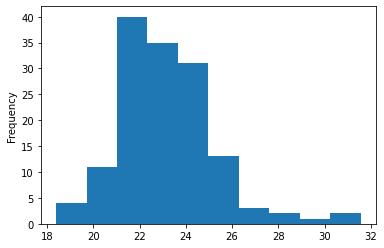

In [35]:
wnba['BMI'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

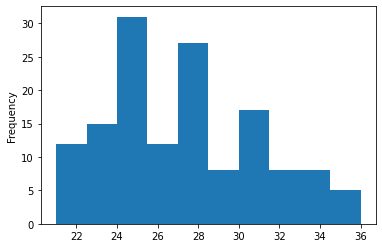

In [36]:
wnba['Age'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

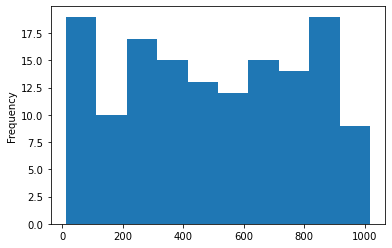

In [37]:
wnba['MIN'].plot.hist()

To visualize frequency distributions for nominal and ordinal variables, we can use:

- Bar plots
- Pie charts

To visualize frequency distributions for variables measured on an interval or ratio scale, we can use a histogram.

Depending on the shape of the histogram, we can have Skewed distributions

- Left skewed (negatively skewed) - the tail of this histogram points to the left
- Right skewed (positively skewed) - the tail of this histogram points to the right

Symmetrical distributions:

- Normal distributions — the values pile up in the middle and gradually decrease infrequency toward both ends of the histogram.

- Uniform distributions — the values are distributed uniformly across the entire range of the distribution